<a href="https://colab.research.google.com/github/essanhaji/fashion-classifier-using-tensorflow/blob/main/fashion_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Fashion classifier model

<div class="alert alert-block" style="margin-top: 20px">
    <h4>
        Released By El Houcine
        ES SANHAJI 
    </h4>
    Data Science Student
</div>

### Importing tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Loading the fashion EMNIST dataset

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Showing a simple in the dataset

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 239 226 237 235 

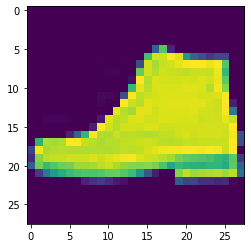

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(training_images[42])

print(training_labels[42])
print(training_images[42])

### Normalizing data

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Creating the model

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(28, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(28, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### Compiling the model

In [28]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

Installing ``livelossplot``.

In [29]:
%%capture
!pip install livelossplot

Creating callbak

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("\nReached 99.0% accuracy so stoping training !!!")
      self.model.stop_training = True

### Reducing the learing rate

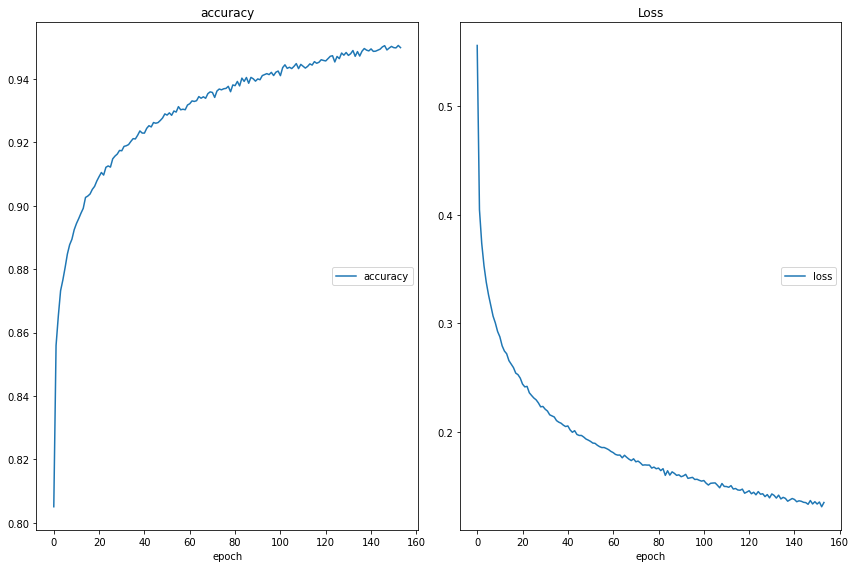

accuracy
	accuracy         	 (min:    0.805, max:    0.951, cur:    0.950)
Loss
	loss             	 (min:    0.131, max:    0.556, cur:    0.135)
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1348 - accuracy: 0.9499
Epoch 155/1000
1818/1875 [============================>.] - ETA: 0s - loss: 0.1314 - accuracy: 0.9508

In [ ]:
%%time

from livelossplot import PlotLossesKeras

stop_training = myCallback()

model.fit(training_images,
          training_labels,
          epochs=1000,
          callbacks=[PlotLossesKeras(), stop_training])

### Evaluating the model

In [26]:
%%time
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4985 - accuracy: 0.8866
CPU times: user 670 ms, sys: 83.1 ms, total: 753 ms
Wall time: 589 ms


[1.4984596967697144, 0.8866000175476074]

# Thank you.